## About the Data

1. Name / Title: 2012 SAT Results
2. Link to Data: https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4
3. Source / Origin: 
	* Author or Creator: Department of Education (DOE)
	* Publication Date: February 20, 2013
	* Publisher: NYC OpenData
	* Version or Data Accessed: 1.0
4. License: CC0: Public Domain
5. Can You Use this Data Set for Your Intended Use Case? Yes

## Format and Samples

### Overview

* Format: csv
* Size: 28k
* Number of Records: 478

### Sample of Data

show a few lines of data from the actual file.  ⚠️ Use "regular" Python to do this in this code block.  Assuming that jupyter-lab was started in your root directory: with open('../data/raw/example-data.csv', 'r')

In the next cell

### Fields or Column Headers

* Field/Column 1: DBN String
* Field/Column 2: SCHOOL NAME String
* Field/Column 3: Num of SAT Test Takers
* Field/Column 4: SAT Critical Reading Avg. Score
* Field/Column 5: SAT Math Avg. Score
* Field/Column 6: SAT Writing Avg. Score

In [2]:
import csv
with open('../data/raw/2012_SAT_Results.csv', 'r') as f:
    next(f)
    line_count = 0
    for line in csv.reader(f):
        print(line)
        line_count += 1
        if line_count == 10:
            break

['01M292', 'HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES', '29', '355', '404', '363']
['01M448', 'UNIVERSITY NEIGHBORHOOD HIGH SCHOOL', '91', '383', '423', '366']
['01M450', 'EAST SIDE COMMUNITY SCHOOL', '70', '377', '402', '370']
['01M458', 'FORSYTH SATELLITE ACADEMY', '7', '414', '401', '359']
['01M509', 'MARTA VALLE HIGH SCHOOL', '44', '390', '433', '384']
['01M515', 'LOWER EAST SIDE PREPARATORY HIGH SCHOOL', '112', '332', '557', '316']
['01M539', 'NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND MATH HIGH SCHOOL', '159', '522', '574', '525']
['01M650', 'CASCADES HIGH SCHOOL', '18', '417', '418', '411']
['01M696', 'BARD HIGH SCHOOL EARLY COLLEGE', '130', '624', '604', '628']
['02M047', '47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECONDARY SCHOOL', '16', '395', '400', '387']


In [3]:
import pandas as pd
df = pd.read_csv('../data/raw/2012_SAT_Results.csv')
df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


1, filling in missing values

The documentation states that the missing values were replaced by 's', I replaced 's' by '' and then drop any row with empty space

In [4]:
import numpy as np
df = df.replace('s', np.nan)
df = df.dropna()
df.tail()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
466,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,23,347,358,350
467,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,24,359,317,358
471,75Q811,P.S. Q811,32,429,444,433
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426
477,79X490,PHOENIX ACADEMY,9,367,370,360


2, visualization
Since the first two digits are the district numbers, I sliced the first 2 digits and call value counts on it and plotted the bar graph
The graph is the number of schools in each district

<AxesSubplot:>

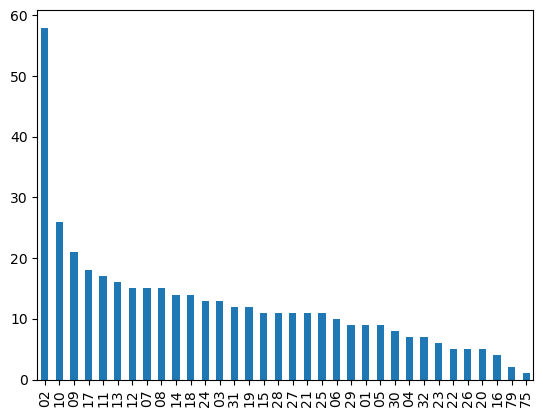

In [5]:
df['DISTRICTNUMBER'] = df.DBN.apply(lambda x: x[:2])
df.tail()
df.DISTRICTNUMBER.value_counts().plot.bar()

3,calculate summary statistics
I changed their types to Int64 using astype, then call describe() on them to get the statistics

In [6]:
df['SAT Critical Reading Avg. Score'] = df['SAT Critical Reading Avg. Score'].astype('Int64')
df['SAT Math Avg. Score'] = df['SAT Math Avg. Score'].astype('Int64')
df['SAT Writing Avg. Score'] = df['SAT Writing Avg. Score'].astype('Int64')
df['SAT Critical Reading Avg. Score'].describe()

count    421.000000
mean     400.850356
std       56.802783
min      279.000000
25%      368.000000
50%      391.000000
75%      416.000000
max      679.000000
Name: SAT Critical Reading Avg. Score, dtype: float64

In [7]:
df['SAT Writing Avg. Score'].describe()

count    421.000000
mean     393.985748
std       58.635109
min      286.000000
25%      360.000000
50%      381.000000
75%      411.000000
max      682.000000
Name: SAT Writing Avg. Score, dtype: float64

In [8]:
df['SAT Math Avg. Score'].describe()

count    421.000000
mean     413.368171
std       64.684655
min      312.000000
25%      371.000000
50%      395.000000
75%      437.000000
max      735.000000
Name: SAT Math Avg. Score, dtype: float64

4,calculate value counts
The following dictionary show the number of schools in each district

In [15]:
df.DISTRICTNUMBER.value_counts()

02    58
10    26
09    21
17    18
11    17
13    16
12    15
07    15
08    15
14    14
18    14
24    13
03    13
31    12
19    12
15    11
28    11
27    11
21    11
25    11
06    10
29     9
01     9
05     9
30     8
04     7
32     7
23     6
22     5
26     5
20     5
16     4
79     2
75     1
Name: DISTRICTNUMBER, dtype: int64